# **Part 2B** Regression: _A Strategic Plan for an Innovative Makati City_ [45 pts]

# Instructions
- Save the notebook solution with your name: ***Surname_FirstName_ML1_FinalExam2025A_2B-Regression.ipynb*** for example, ***Co_Kenneth_ML1_FinalExam2025A_2B-Regression.ipynb***

- Submit via ALICE by March 12 (Tuesday), 11:59pm. *LATE SUBMISSIONS NOT ACCEPTED.*

- *ANY FORM of CHEATING is PUNISHABLE BY EXPULSION.*

# Checklist
You can use this to track your progress.

**Part 2B: Regression [45 pts]**
- (X) Read this Checklist
- ( ) Set up correct file path (data_dir)
- ( ) Read the Task Instructions

- ( ) Task B1 - Models [23 pts]
    - ( ) Task B1-1 - Data Preprocessing [3 pts]
    - ( ) Task B1-2 - Machine Learning Models [8 pts]
    - ( ) Task B1-3 - Optimal Parameter Tuning [6 pts]
    - ( ) Task B1-4 - Model Interpretability [6 pts]

- ( ) Task B2 - Report [22 pts]
    - Quality of report [6 pts]
    - ( ) Recommendations for an Innovative Makati City [16 pts]
        - ( ) Task B2-1 - Executive Summary [5 pts]
        - ( ) Task B1-2 - Recommendations [11 pts]
            - ( ) Strategic Picture [2 pts]
            - ( ) Recommendations in Detail [9 pts]

# Background
<u>Data Source</u>: Global Innovation Index of 200 not-so-fictitious Cities 

The dataset compares the innovation index of 200 cities based on the following:
							
**Attribute Information**

* **Total_Road_Length** - Total road length ($\times$ 1000 kms )
* **GDP_per_Capita** -  in USD	  
* **Population_Size** - Number of residents $\times$ 1000   
* **Area_km2** - Land area in km$^2$ 
* **Tourists_Annual**  Number of tourists arriving annually
* **Foreigner_to_Local_ratio**- Ratio of non-passport holder with local residents
* **Mean_Age_Population** - Average age of population    
* **Age_Stdev_Population** - Standard deviation of the age of population
* **Literacy_Rate** - Percentage of population who can read and write    
* **PhD_per_10k** - Number of PhD per 10,000 of population
* **Innovation_Score** - The overall score is the simple average of the sub-index scores from Innovation Input (e.g. human capital and research, infrastructure) and Output (e.g. knowledge and technology outputs, creative outputs). See https://www.wipo.int/global_innovation_index/en/



## Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [12]:
# TODO: set up correct filepath
data_dir = '/home/msds-pt2025a/scastillo/ml1_final_exam/'

In [13]:
df_innovation= pd.read_excel(data_dir +'FinalExam_InnovationScore.xlsx', sheet_name='Sheet1')
dummy = df_innovation.copy(deep=True)
dummy.head()

ID Number  Total_Road_Length  GDP_per_Capita  Population_Size  Area_km2  \
0          1              133.0         35188.0           5074.0     18589   
1          2              269.0         52465.0            983.0     25067   
2          3               76.0         13283.0           7364.0      5064   
3          4              129.0         10392.0           4086.0     22612   
4          5               91.0         50818.0           3608.0     10964   

   Tourists_Annual  Foreigner_to_Local_ratio  Mean_Age_Population  \
0         468000.0                    0.3150                   59   
1        1411308.0                    0.1140                   58   
2         100950.0                    0.6394                   58   
3         134056.0                    0.2566                   47   
4         462443.0                    0.3584                   61   

   Age_Stdev_Population  Literacy_Rate  PhD_per_10k  Global Innovation Score  
0             13.681146          0.895          110                   16.076  
1             14.615773          0.982           22                   21.583  
2             11.615773          0.969            6                   35.037  
3             14.855655          0.857           87                   13.855  
4             10.810250          0.941          105                   31.823

# Task Instructions

You are an ADB consultant, and you are tasked with creating a report (this Python Notebook) to advise the Makati City office on how it can strategize to secure a _high innovation index score_ in the next ten years.

ADB hired professors Christopher and Erika to review your report critically. Aside from the feasibility of execution, the professors are also to make recommendations on your suitability to be considered in the ADB data science consultants pool.

This Python Notebook will be graded according to two parts:
- <u>Task B1</u> Models - the technical portion covering machine learning modeling [23 pts]
- <u>Task B2</u> Report - the report for Makati City office [22 pts]

# Task B1 - Models

## Exploratory Data Analysis

As with any good ML practitioner, we will first conduct EDA on our dataset. Props to our LT-mate for teaching us about an instant EDA package, `ydata_profiling`, while we were doing our DMW project.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

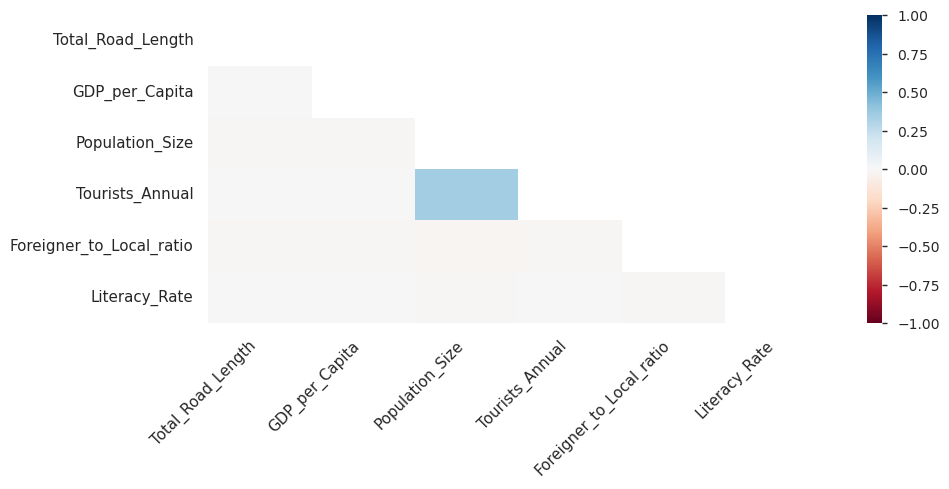

In [14]:
from ydata_profiling import ProfileReport

eda = ProfileReport(df_innovation, title='Global Innovation Index')
eda

## EDA Interpretation

Based on the EDA by `ydata_profiling`, we can already identify the preprocessing necessary for this dataset. On the **Alerts** tab, it shows the features that have high correlation with each other. We can also see the features that are highly correlated with our target variable, `Global Innovation Score`, which are `Foreign_to_Local_Ratio` (positive correlation), `Population_Size` (positive correlation) and `Area_km2` (negative correlation). The **Overview** tab also indicates some missing values from a couple of feature but more significantly in highly correlated ones, `Population_Size` and `Foreign_to_Local_Ratio`. We will verify this in the preprocessing stage and impute accordingly.

## Task B1-1 - Preprocessing

<div class="alert alert-block alert-info">
<b>Task B1-1: Data Preprocessing [3 pts]</b>

Implement basic data preprocessing.
</div>

### Check for Missing/Null Values

Check for missing values and impute with the mean, if any.

In [15]:
missing_values = df_innovation.isnull().sum()
print(f"Number of missing values per feature prior imputation:\n\n{missing_values}\n")

Number of missing values per feature prior imputation:

ID Number                   0
Total_Road_Length           1
GDP_per_Capita              1
Population_Size             4
Area_km2                    0
Tourists_Annual             2
Foreigner_to_Local_ratio    3
Mean_Age_Population         0
Age_Stdev_Population        0
Literacy_Rate               1
PhD_per_10k                 0
Global Innovation Score     0
dtype: int64



In [16]:
df_innovation = df_innovation.fillna(df_innovation.mean())
missing_values = df_innovation.isnull().sum()
print(f"Number of missing values per feature after imputation:\n\n{missing_values}")

Number of missing values per feature after imputation:

ID Number                   0
Total_Road_Length           0
GDP_per_Capita              0
Population_Size             0
Area_km2                    0
Tourists_Annual             0
Foreigner_to_Local_ratio    0
Mean_Age_Population         0
Age_Stdev_Population        0
Literacy_Rate               0
PhD_per_10k                 0
Global Innovation Score     0
dtype: int64


### Check for Duplicates

In [17]:
duplicate_count = df_innovation.duplicated().sum()
duplicate_count

0

### Check for Data Validity

In [20]:
for i in df_innovation.columns:
    print(df_innovation[i].value_counts())
    print(f"max value: {df_innovation[i].max()}")
    print(f"min value: {df_innovation[i].min()}\n")

ID Number
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64
max value: 200
min value: 1

Total_Road_Length
222.0    4
278.0    4
144.0    4
201.0    3
97.0     3
        ..
117.0    1
134.0    1
208.0    1
221.0    1
232.0    1
Name: count, Length: 141, dtype: int64
max value: 299.0
min value: 55.0

GDP_per_Capita
35188.0    1
32334.0    1
8554.0     1
18045.0    1
9305.0     1
          ..
24413.0    1
14855.0    1
19441.0    1
37072.0    1
29166.0    1
Name: count, Length: 200, dtype: int64
max value: 59877.0
min value: 2030.0

Population_Size
4923.112245    4
4558.000000    2
1513.000000    2
3277.000000    2
1203.000000    2
              ..
7744.000000    1
8062.000000    1
7527.000000    1
4548.000000    1
8887.000000    1
Name: count, Length: 192, dtype: int64
max value: 9969.0
min value: 212.0

Area_km2
18589    1
7794     1
17110    1
15157    1
21685    1
        ..
5726     1
26414    1
2

### Check for Scaling

Check scale and apply scaling accordingly.

In [18]:
df_innovation.describe()

ID Number  Total_Road_Length  GDP_per_Capita  Population_Size  \
count  200.000000         200.000000      200.000000       200.000000   
mean   100.500000         181.532663    31224.040201      4923.112245   
std     57.879185          68.915925    15602.407964      2746.597410   
min      1.000000          55.000000     2030.000000       212.000000   
25%     50.750000         124.250000    17772.750000      2742.500000   
50%    100.500000         182.500000    31901.500000      4923.112245   
75%    150.250000         243.750000    43256.250000      7209.750000   
max    200.000000         299.000000    59877.000000      9969.000000   

           Area_km2  Tourists_Annual  Foreigner_to_Local_ratio  \
count    200.000000     2.000000e+02                200.000000   
mean   15545.105000     5.713507e+05                  0.352408   
std     8453.526615     3.719128e+05                  0.175270   
min      775.000000     3.410400e+04                  0.024800   
25%     9124.250000     2.578980e+05                  0.212100   
50%    14789.500000     4.969385e+05                  0.361000   
75%    22626.750000     8.114785e+05                  0.497550   
max    31852.000000     1.692100e+06                  0.650600   

       Mean_Age_Population  Age_Stdev_Population  Literacy_Rate  PhD_per_10k  \
count           200.000000            200.000000     200.000000   200.000000   
mean             52.100000             11.918865       0.903065    72.050000   
std               7.573426              3.314082       0.059962    40.659605   
min              40.000000              6.403124       0.802000     1.000000   
25%              46.000000              9.123838       0.847000    39.500000   
50%              52.000000             11.279786       0.902533    72.000000   
75%              58.250000             14.782330       0.957000   105.250000   
max              65.000000             18.062258       1.000000   150.000000   

       Global Innovation Score  
count               200.000000  
mean                 31.676025  
std                  13.793406  
min                   9.732000  
25%                  19.597750  
50%                  28.523000  
75%                  42.033750  
max                  64.021000

In [21]:
scaler = StandardScaler()
scaled_df_innovation = pd.DataFrame(scaler.fit_transform(df_innovation), columns=df_innovation.columns)
scaled_df_innovation

ID Number  Total_Road_Length  GDP_per_Capita  Population_Size  Area_km2  \
0    -1.723412          -0.705997        0.254698         0.055074  0.360978   
1    -1.706091           1.272374        1.364806        -1.438143  1.129208   
2    -1.688771          -1.535168       -1.152775         0.890925 -1.242961   
3    -1.671450          -0.764185       -1.338532        -0.305546  0.838068   
4    -1.654129          -1.316965        1.258981        -0.480017 -0.543276   
..         ...                ...             ...              ...       ...   
195   1.654129          -1.724277        1.395455         0.759525 -0.084805   
196   1.671450           1.548764        1.125141         0.467525 -0.470936   
197   1.688771           0.370469        1.409334        -1.674663  1.377418   
198   1.706091          -0.735091       -0.054168         1.223806  1.114384   
199   1.723412           0.734141       -0.132236         1.446821  0.707855   

     Tourists_Annual  Foreigner_to_Local_ratio  Mean_Age_Population  \
0          -0.278587                 -0.213967             0.913367   
1           2.264146                 -1.363648             0.780995   
2          -1.267988                  1.641538             0.780995   
3          -1.178749                 -0.548004            -0.675097   
4          -0.293566                  0.034272             1.178111   
..               ...                       ...                  ...   
195        -0.641047                  0.582230             0.383879   
196         2.243283                  0.652012            -1.601701   
197         1.425998                 -1.669086            -0.542725   
198        -0.467299                  0.223026             0.780995   
199         0.283842                  0.050288            -0.145609   

     Age_Stdev_Population  Literacy_Rate  PhD_per_10k  Global Innovation Score  
0                0.533090      -0.134845     0.935701                -1.133815  
1                0.815814       1.319718    -1.234040                -0.733564  
2               -0.091685       1.102369    -1.628539                 0.244277  
3                0.888379      -0.770171     0.368609                -1.295238  
4               -0.335356       0.634234     0.812420                 0.010682  
..                    ...            ...          ...                      ...  
195              0.150443       1.336437    -0.568324                 1.811483  
196              0.727721       0.316571     1.502792                 1.652894  
197             -0.299675       1.152526     0.837076                -0.770559  
198             -0.394185       1.269560    -1.702507                -0.254092  
199             -0.840174       1.386594     0.787764                -0.329098  

[200 rows x 12 columns]

## Task B1-2 - ML Models
<div class="alert alert-block alert-info">
<b>Task B1-2: Machine Learning Models [8 pts]</b>

Implement at least 4 machine learning methods using default <i>sklearn</i> settings with a <u>80-20 train-test split</u>. Evaluate models using R$^2$ test accuracy.

Report the results in table form and provide the following metrics:
- Method
- Train Accuracy
- Test Accuracy
- Training Time
- Top Predictor Variable
</div>

For the implementation, I would be using the code previously shared in our LT discussions.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [25]:
import time

X = scaled_df_innovation.drop('Global Innovation Score', axis=1)
y = scaled_df_innovation["Global Innovation Score"]
random_state = 888

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

In [33]:
# run models on default parameters
models = {
    'Ridge Regression': Ridge(random_state=random_state),
    'Lasso Regression': Lasso(random_state=random_state),
    'Support Vector Regression': SVR(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=random_state),
    'Gradient Boosting': GradientBoostingRegressor(random_state=random_state),
    'AdaBoost': AdaBoostRegressor(random_state=random_state),
    'XGBoost': XGBRegressor(random_state=random_state)
}

def knn_feature_impact(X_train, y_train, model, features):
    """
    Utility function to run KNNRegressor with each feature indivudally
    to determine the feature importance
    """
    results = {}
    for f in features:
        model.fit(np.array(X_train[f]).reshape(-1, 1), y_train)
        y_pred = model.predict(np.array(X_test[f]).reshape(-1, 1))
        test_r2 = r2_score(y_test, y_pred)
        results[f] = {'test_r2': test_r2}
    results = dict(sorted(results.items(), key=lambda x: x[1]['test_r2'], reverse=True))
    top_key = list(results.keys())[0]
    return ([top_key], results[top_key]['test_r2'])

def get_feature_importance(X_train, y_train, name, model, features):
    """
    Utility function to determine the feature importances of the model
    based on the scores outputted
    """
    if "Regression" in name:
        coefs = model.coef_
        if coefs.shape[0] == 1:
            coefs = coefs[0]
    elif "Neighbors" in name:
        return knn_feature_impact(X_train, y_train, model, features)
    else:
        coefs = model.feature_importances_
    max_ = max(coefs)
    feature_index = np.where(coefs == max_)[0]
    return list(features[feature_index].values), max_

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time

    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)

    y_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)

    top_predictor, score = get_feature_importance(X_train, y_train, name, model, X_train.columns)
    results.append([name, runtime, train_r2, test_r2, top_predictor, score])
columns = ['Model', 'Runtime (s)', 'Train R2', 'Test R2', 'Top Predictor', 'Score']
results_df = pd.DataFrame(results, columns=columns)
results_df.sort_values(by=['Test R2', 'Runtime (s)'] , ascending=False)

/opt/conda/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/conda/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/conda/lib/python3.

Model  Runtime (s)  Train R2   Test R2  \
6                   AdaBoost     0.101966  0.933172  0.815257   
0           Ridge Regression     0.003304  0.817459  0.796106   
5          Gradient Boosting     0.123590  0.992587  0.789560   
2  Support Vector Regression     0.010702  0.811937  0.779077   
4              Random Forest     0.208254  0.973630  0.773249   
7                    XGBoost     6.492088  1.000000  0.720847   
3        K-Nearest Neighbors     0.001355  0.809431  0.681335   
1           Lasso Regression     0.002726  0.000000 -0.003646   

                                       Top Predictor     Score  
6                         [Foreigner_to_Local_ratio]  0.628612  
0                         [Foreigner_to_Local_ratio]  0.677714  
5                         [Foreigner_to_Local_ratio]  0.752206  
2                         [Foreigner_to_Local_ratio]  0.833204  
4                         [Foreigner_to_Local_ratio]  0.769213  
7                         [Foreigner_to_Local_ratio]  0.864483  
3                         [Foreigner_to_Local_ratio]  0.581153  
1  [ID Number, Total_Road_Length, GDP_per_Capita,... -0.000000

### Interpretation of Results on Default Parameters

AdaBoost has the best performance with the highest Test R2 at 0.815257 while LASSO performed poorly with a negative Test R2. It is notable that the top predictor feature for almost all the models, except LASSO Regression, is `Foreigner_to_Local_ratio`. It appears that LASSO shrunk all the coefficients to 0, doing too much of its feature selection function.

KNN has the fastest runtime at 0.001355 seconds while XGBoost has the longest at 6.492088 seconds. The relatively fast runtime was expected considering that the dataset only has 200 rows, and partly because can't afford to wait too long for the results in an exam.

## Task B1-3 - Optimal Parameters
<div class="alert alert-block alert-info">
<b>Task B1-3: Optimal Tuning Parameters [6 pts]</b>

Optimize the R^2 test set accuracy (with 10 trials, 80-20 train-test split) of your above models.
</div>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

def optimize_model(name):
    params_dict = {
        'AdaBoost': {
            'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100],
            'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'loss': ['linear', 'square', 'exponential']
        },
        'Lasso Regression': {
            'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'fit_intercept': [True, False]
        },
        'Ridge Regression': {
            'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'fit_intercept': [True, False]
        },
        'Support Vector Regression': {
            'degree': [1, 2, 3, 4, 5],
            'gamma': ['scale', 'auto'],
            'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        },
        'K-Nearest Neighbors': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50, 60],
        },
        'Random Forest': {
            'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100],
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'max_features': ['sqrt', 'log2']
        },
        'Gradient Boosting': {
            'loss': ['squared_error', 'absolute_error'],
            'learning_rate': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100],
            'criterion': ['squared_error', 'friedman_mse'],
            'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'max_features': ['sqrt', 'log2']
        },
        'XGBoost': {
            'reg_lambda': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'alpha': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        }
    }

    models = {
        'Ridge Regression': Ridge(random_state=random_state),
        'Lasso Regression': Lasso(random_state=random_state),
        'Support Vector Regression': SVR(kernel='linear'),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Random Forest': RandomForestRegressor(random_state=random_state),
        'Gradient Boosting': GradientBoostingRegressor(random_state=random_state),
        'AdaBoost': AdaBoostRegressor(random_state=random_state),
        'XGBoost': XGBRegressor(random_state=random_state)
    }
    parameters = params_dict[name]
    model = models[name]
    model.fit(X_train, y_train)
    scorer = make_scorer(r2_score)
    grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=10, scoring=scorer, verbose=1)
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    try:
        best_model = model.set_params(**best_params, random_state=random_state)
    except:
        best_model = model.set_params(**best_params)
    y_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    return best_params, test_r2

best_params_dict = {}
for mname in models.keys():
    best_params, test_r2 = optimize_model(mname)
    best_params_dict[mname] = best_params
    df = pd.DataFrame.from_dict(best_params, orient='index', columns=['Value'])
    print(f"The best parameters for {mname}")
    print(f"Test R2 Score: {test_r2}")
    display(df)

## Task B1-4 - Interpretability
<div class="alert alert-block alert-info">

<b>Task B1-4: Model Interpretability [6 pts]</b>
- Generate the feature importance plot of your chosen best model/s.
- Give insights on the features deemed important by the best model.
</div>

In [ ]:
import matplotlib.pyplot as plt

In [7]:
best_model = AdaBoostRegressor(**best_params_dict['AdaBoost'], random_state=random_state)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

In [ ]:
def get_feature_importance_best(model, features):
    """
    Utility function to determine the feature
    importances of the best model
    """
    coefs = model.feature_importances_
    feature_importance = sorted(list(zip(coefs, features)), reverse=True)
    weight, features = zip(*feature_importance)
    plt.figure(figsize=(12, 5))
    plt.ylabel("Weight")
    plt.xlabel("Feature")
    plt.bar(height=list(weight), x=list(features))
    plt.title('Feature Importance of the Best Model')
    plt.show()

features = X_train.columns
get_feature_importance_best(best_model, features)

<div class="alert alert-block alert-success">
<b>Response: <u>B1-4</u></b> Discuss here the interpretations of model feature importance for your chosen best model/s.

The top feature for almost all the models is `Foreigner_to_Local_Ratio` based on the model results and the feature importance plot. The next 2 important features are `Area_km2` and `GDP_per_Capita`. The rest of the features appear to be insignificant relative to the top 3 features. The top feature implies that when there are more foreigners in a city, it pushes the `Global Innovation Score` higher. It's interesting that `Literacy_Rate` is not a top feature, considering that `Global Innovation Score` is our target variable and it is expected that a country with literate people would be more capable to drive innovation, hence increasing the `Global Innovation Score`.
</div>

# Task B2 - Report
<div class="alert alert-block alert-info">
<b>Task B2: Report for Makati City [22 pts]</b>

The grading for this will be divided between these two criteria:

- <b>Quality of Report [6 pts]</b>
    - This is _NOT A TASK_, and mainly comprises of the qualitative factors used to evaluate your report.
    - <u>Organization </u> Words, code, and figures are clearly labeled and logically organized.
    - <u>Conciseness</u> Minimal visual clutter and superfluous information.
    - <u>Clarity</u> Statements and solutions proposed are clear. Reasoning is not self-contradictory.
    - <u>Correctness</u> Statements are factually correct. Sources are properly cited.

- <b>Recommendations for an Innovative Makati City [16 pts]</b>
    - <u>Task B2-1</u> **Executive Summary [5 pts]**
        - Provide a high level summary of your analysis on the Global Innovation Score and what would be the key takeaway/s relevant to our goals.

    - <u>Task B2-2</u> **Recommendations [11 pts]**
        - Explain the general picture or theme of your recommended strategy. This is to summarize all your recommendations into an easily digestible concept or theme. **[2 pts]**
        - Write 3-5 recommendations on how it can strategize to secure a _high innovation index score_ in the next ten years. **[9 pts]**
            - Note: if you go with 2-3 recommendations, I would expect more details / a deeper dive for each (e.g. 4-6 sentences for each with supporting data or figures). If you go with 4-6 recommendations, I would expect 2-3 sentences and some supporting evidence for each.

- Note there is *NO expectation to use external sources of data*, though reading up on this topic may help give you ideas on what to look for or recommend.
</div>

## Task B2-1 - Executive Summary
<div class="alert alert-success">

**Response: <u>B2-1</u> Executive Summary [5 pts]** 
The Global Innovation Index (GII) ranks world economies according to their innovation capabilites. Consisting of roughly 80 indicators, grouped into innovation inputs and outputs, the GII aims to capture the multi-dimensional facets of innovation. Philippines ranks 56thamong the 132 economies featured in the GII 2023.

This study provides insights on how several indicators influence a city's contribution to the global innovation score. The dataset contains features for 200 cities that seem to be indicators for the overall status of a city. Through the best performing regression model the top 3 most important features were identified: `Foreigner_to_Local_ratio`, `Area_km2`, and `GDP_per_Capita` with `Foreigner_to_Local_ratio` having the highest influence in the global innovation score. `Foreigner_to_Local_ratio` and `GDP_per_Capita` were identified to be positively correlated to `Global Innovation Score` while `Area_km2` was identified to be negatively correlated.

With this, the researcher recommends that Makati City focus its policy-making, and investment thrust with `Foreign_to_Local_ratio` and `GDP_per_Capita` in mind. For the `Area_km2`, the Makati government can't really do anything about it unless there would be a realignment which is highly unlikely.
</div>

In [8]:
# CODE HERE for Executive Summary (if any)

## Task B2-2 - Recommendations

<div class="alert alert-success">

### Strategic Picture
**Response: <u>B2-2</u>** Explain the general picture or theme of your recommended strategy. [2 pts]

Based on the results of this study, Makati should consider setting goals and plans that would increase `Foreign_to_Local_ratio` and `GDP_per_Capita` to further elevate the `Global Innovation Score`. It appears that the way to do this is to encourage foreign investments by making the city more alluring to overseas companies while still serving the interests of local investors and the population in general.
</div>

<div class="alert alert-success">

### Recommendation #1
**Response: <u>B2-2</u> Recommendation #1**

### Incentives for Foreign Entities and Its Representative

The following are the researchers recommendations:
    
1. Tax Incentives: Tax breaks or reductions on corporate income tax, capital gains tax, or other taxes applicable to foreign investors. This can include tax holidays, where investors are exempt from paying taxes for a certain period.

2. Financial Incentives: Financial support such as grants, subsidies, or low-interest loans provided by the government or other financial institutions to support foreign investment projects.

3. Investment Protection: Legal and regulatory frameworks that protect foreign investors' rights and investments, including guarantees against expropriation, nationalization, or unfair treatment.

4. Infrastructure Development: Investments in infrastructure projects such as transportation, energy, telecommunications, and utilities to improve the business environment and facilitate foreign investment.

5. Special Economic Zones (SEZs): Designated areas with special economic regulations and incentives to attract foreign investment, such as streamlined customs procedures, simplified regulations, and tax benefits.
    
6. Scholarships and Financial Aid: Providing scholarships, grants, and financial aid to international students to help cover tuition fees, living expenses, and other educational costs. This can make studying abroad more affordable and attractive for foreign students.

7. Work Opportunities: Offering work opportunities such as internships, part-time jobs, or post-graduation work permits to international students. This allows them to gain valuable work experience, supplement their income, and potentially transition to full-time employment after graduation.

8. Diverse and Inclusive Learning Environment: Promoting a diverse and inclusive learning environment that welcomes students from different cultural backgrounds and fosters cross-cultural exchange and understanding.

9. Language Support and Cultural Integration Programs: Providing language support services, cultural orientation programs, and integration initiatives to help foreign students adapt to the new academic and social environment.

10. Research Opportunities: Offering research opportunities, collaborative projects, and access to cutting-edge facilities and resources to international students. This allows them to engage in academic research and innovation and contribute to the advancement of knowledge in their field of study.
</div>

In [9]:
# CODE HERE for Recommendation 1 (if any)

<div class="alert alert-success">

### Recommendation #2
**Response: <u>B2-2</u> Recommendation #X**

_Place response here_

This is a suggested template, you don't have to use this format.
</div>

In [10]:
# CODE HERE for Recommendation X (if any)